<a href="https://colab.research.google.com/github/GaneshkumarPatel/NYC-trip-duration-prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [7]:
# !pip install lux
# !pip install klib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline


In [8]:

import klib


In [132]:
df=pd.read_csv(path+'NYC Taxi Data.csv')

# Data Exploration

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_weekday,pickup_minute,pickup_day,dropoff_day,dropoff_day_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,Monday,17,0,24,2016-03-14,2016-03-14,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,0,6,43,2016-06-12,2016-06-12,Sunday


In [ ]:
df.tail(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_weekday,pickup_minute,pickup_day,dropoff_day,dropoff_day_name
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,Tuesday,15,1,56,2016-01-05,2016-01-05,Tuesday
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198,4,Tuesday,14,1,44,2016-04-05,2016-04-05,Tuesday


In [128]:
df.dtypes.value_counts()

object     4
float64    4
int64      3
dtype: int64

We have to change datatype of our datetime columns from object to datetime dtype

In [129]:
df.describe(include='object')

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id2875421,2016-03-04 08:07:34,2016-02-19 19:25:04,N
freq,1,5,5,1450599


In [130]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [10]:
#lets convert all datatype and reduce sore memory using klib library
df=klib.data_cleaning(df)
df.info()

Shape of cleaned data: (1458644, 11)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 51.47 MB (-42.05%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   id                  1458644 non-null  string  
 1   vendor_id           1458644 non-null  int8    
 2   pickup_datetime     1458644 non-null  string  
 3   dropoff_datetime    1458644 non-null  string  
 4   passenger_count     1458644 non-null  int8    
 5   pickup_longitude    1458644 non-null  Float32 
 6   pickup_latitude     1458644 non-null  Float32 
 7   dropoff_longitude   1458644 non-null  Float32 
 8   dropoff_latitude    1458644 non-null  Float32 
 9   store_and_fwd_flag  1458644 non-null  category
 10  

1. we can see our datatypes are correctly identified and assigned to it respectively and it reduced our data storage memory by 42%
2.From above its clear that id column has every row as unique record thus we can drop this column as it will not add any benefit in regression

In [133]:
##just checking for any duplicates
df[df.duplicated()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [134]:

df.drop('id',axis=1,inplace=True)

In [135]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Some observations about data:
1. id column has unique value same as number od records, this column will not be useful for regression purpose.
2. passenger_count and trip_duration both columns has measurable difference between their mean and meadian, its a sign of skewness. we will have to close look those columns for skewness and outlier presence.
3. we dont have any missing value in our dataset

**Feature Extraction from given data**

In [135]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)


df['pickup_month']=df.pickup_datetime.dt.month
df['pickup_day_name']=df.pickup_datetime.dt.day_name()
df['pickup_hour']=df.pickup_datetime.dt.hour
df['pickup_weekday']=df.pickup_datetime.dt.weekday
df['pickup_minute']=df.pickup_datetime.dt.minute
df['pickup_day']=df.pickup_datetime.dt.date
df['dropoff_day']=df.dropoff_datetime.dt.date
df['dropoff_day_name']=df.dropoff_datetime.dt.day_name()


# Univariate analysis
**used to check distributions of features , presence of outliers, in short it helps to clean data in well manner**

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


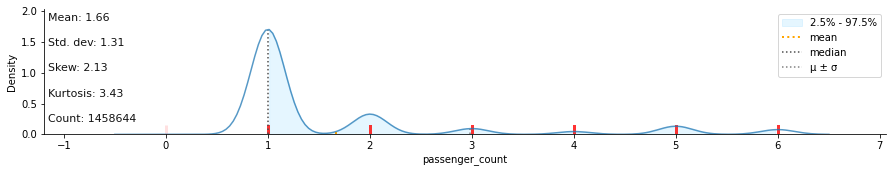

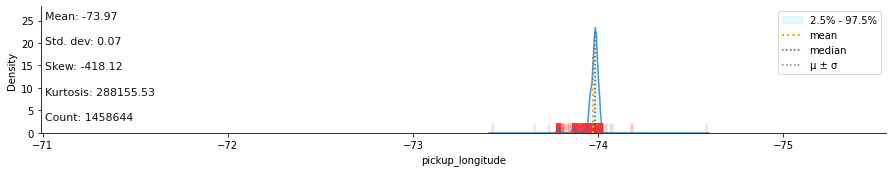

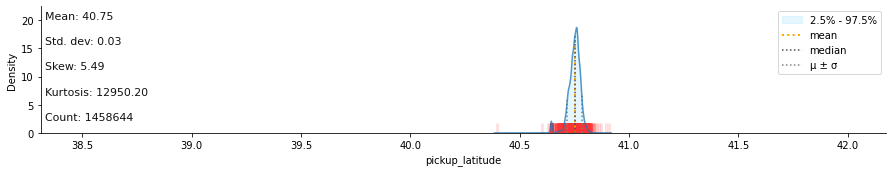

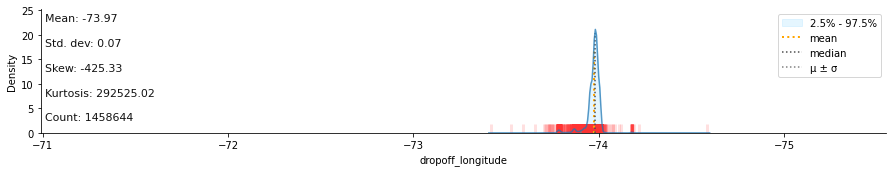

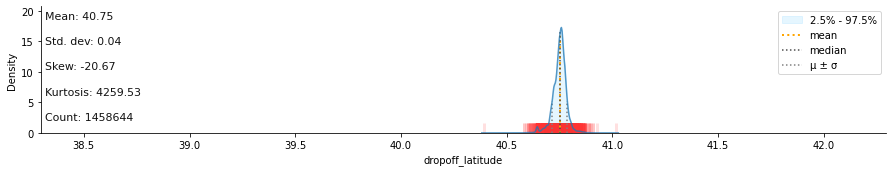

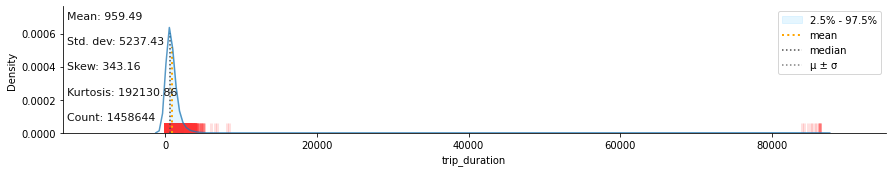

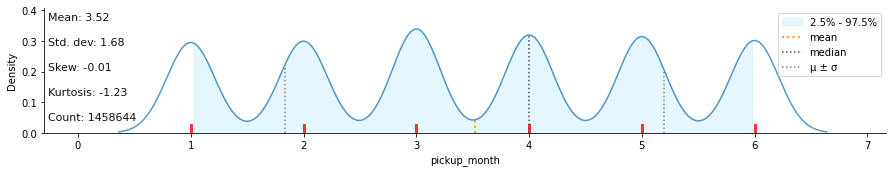

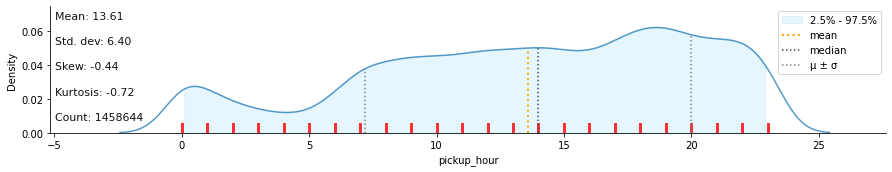

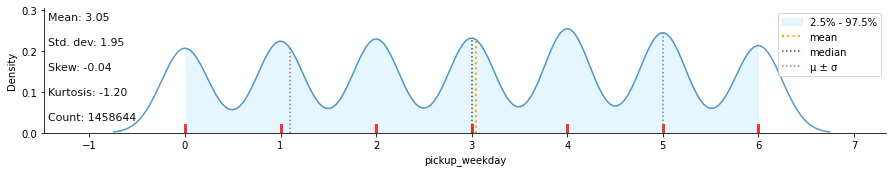

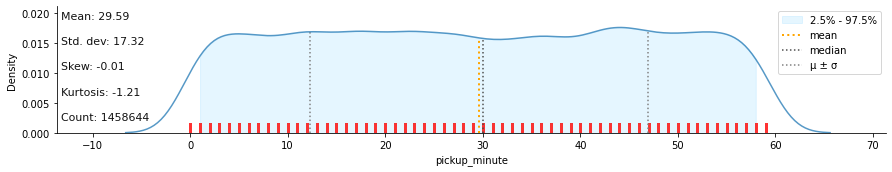

In [137]:
# lets plot distribution to infer some insigts from available features

klib.dist_plot(df)

In [138]:
# Outliers Visualization
def numeric_columns_plot(df):
  import warnings
  warnings.filterwarnings('ignore')
  import seaborn as sns
  ncols= len(df.columns) if len(df.columns) < 6 else 6
  nrows= int(len(df.columns)/5) if len(df.columns) > 6 else 1
  fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

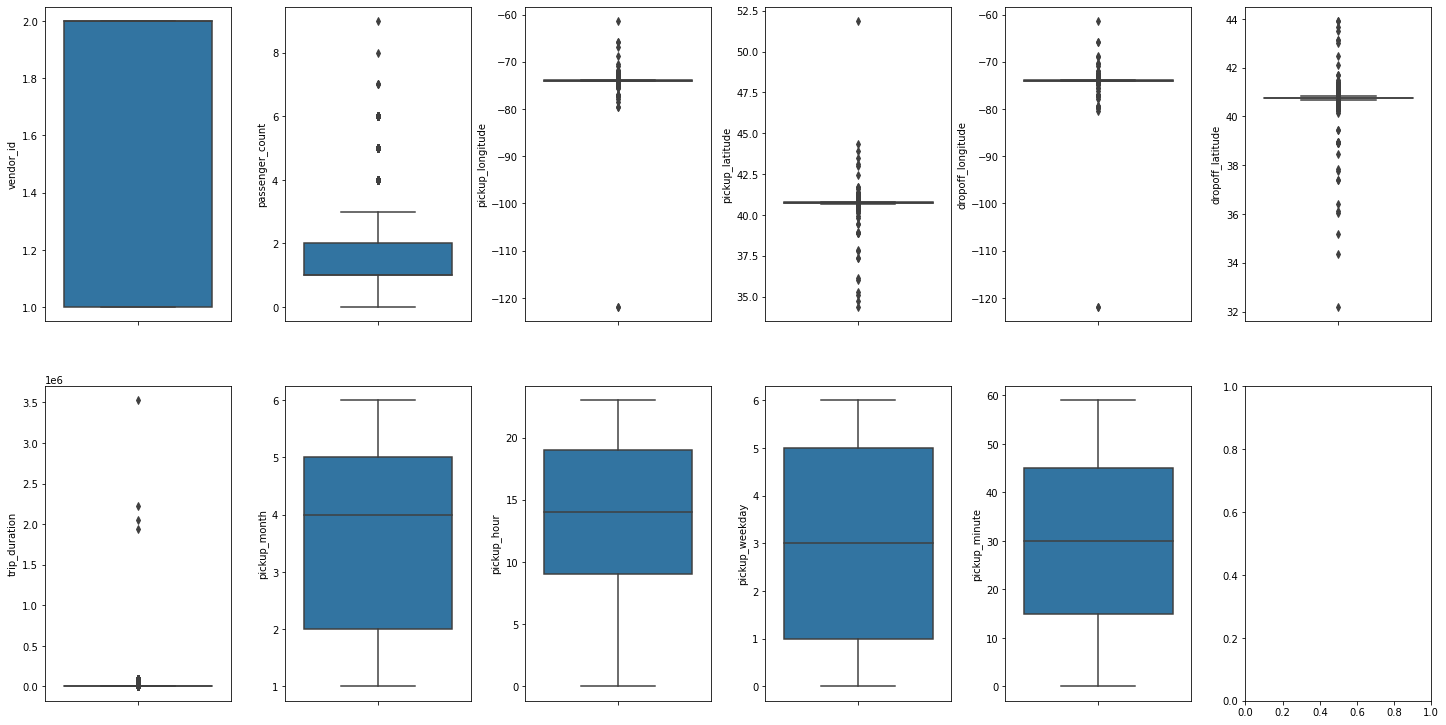

In [139]:
numeric_columns_plot(df[df.describe().columns])

In [144]:
# plot a boxplot for the label by each categorical feature  
def categorical_features_plot(df,target_continuous):
  import warnings
  warnings.filterwarnings('ignore')
  for col in df.describe(include='object').columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = target_continuous, by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel(target_continuous)
plt.show()

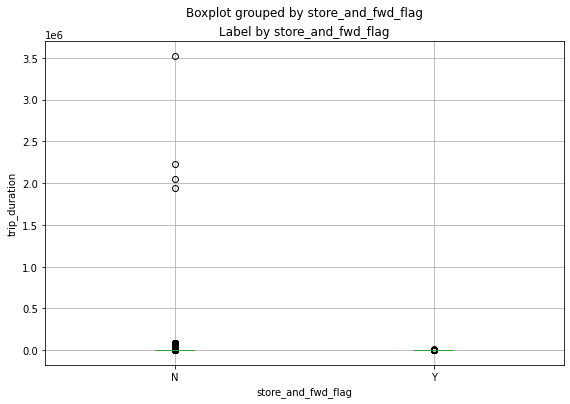

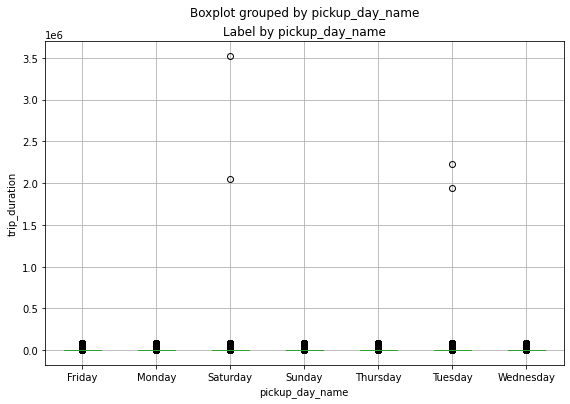

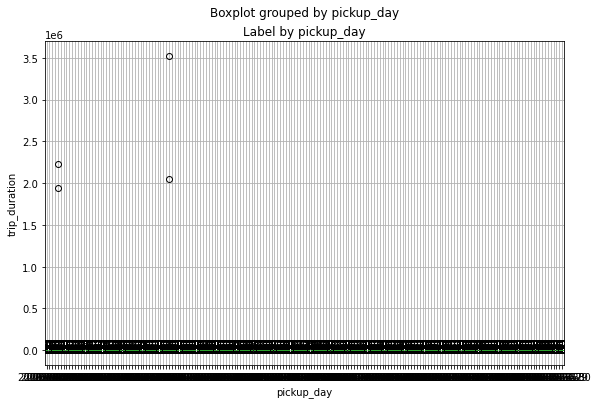

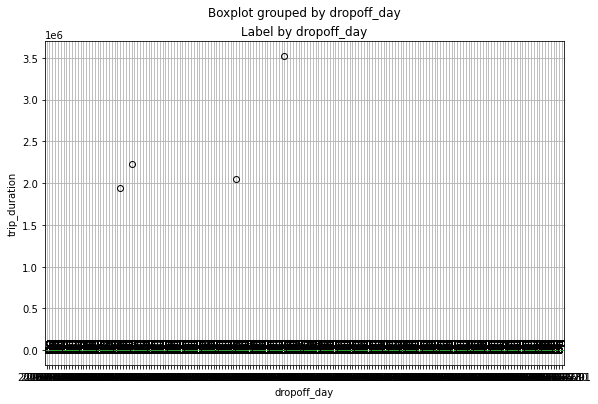

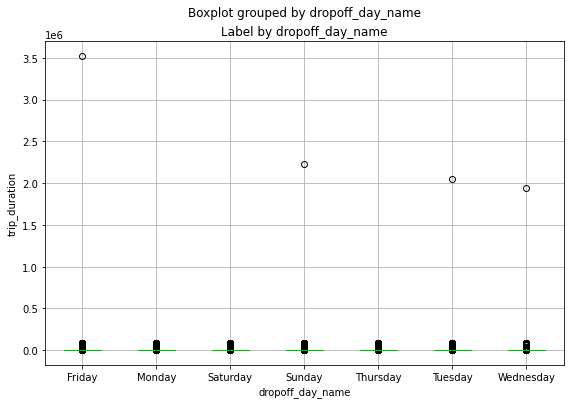

In [145]:
categorical_features_plot(df,'trip_duration')

From above plots its clear that we have to focus more on passenger_count column and trip_duration column for outlier treatment

In [140]:
 df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

1. We came to know that there are some entries where passenger counts are zero, this record might be representing the canceled trips but for our usecase it becomes not useful so we treat it as an outlier
2. passenger count contains some 7,8,9 values those doesn't have any weightage to stand with 14 billon records data and As its a driver entered value its error chances increases, so we can treat them also as an outlier.

In [17]:
#lets clean passenger count data
df_nz=df[(df.passenger_count>0) & (df.passenger_count<7)]

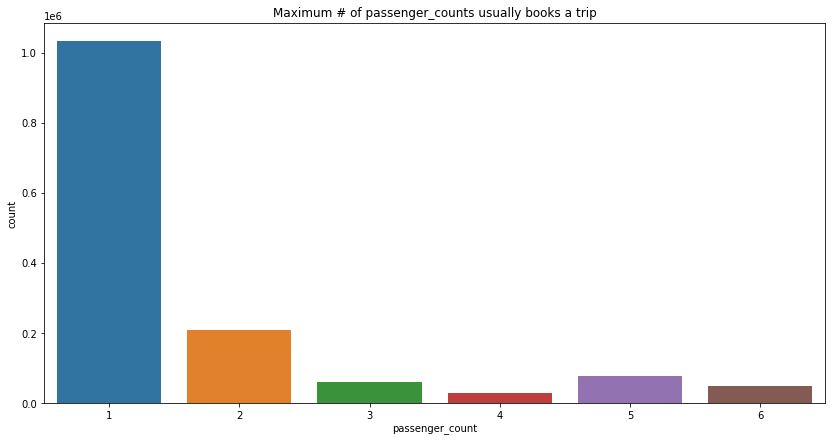

In [142]:
plt.figure(figsize=(14,7))
sns.countplot(df_nz.passenger_count)
plt.title('Maximum # of passenger_counts usually books a trip')
plt.show()

In [143]:
# checking for trips having more than one day duration
df_nz[(df_nz.trip_duration>86400)] # 24*60*60=86400 its a total seconds in a day

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_weekday,pickup_minute,pickup_day,dropoff_day,dropoff_day_name


we came to know **4 no. of trip records** are having **more than 15 days trip duration** which seems to be unlikely thus we will trating it as **outlier**

In [18]:
#cleaning data with removing more than one day trip duration
df_nz=df_nz[~(df_nz.trip_duration>86400)]

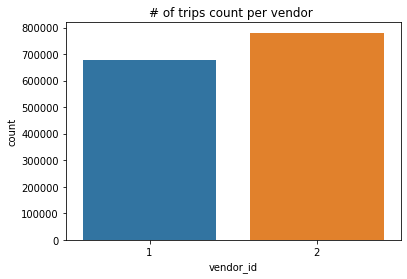

In [22]:
# Vendor count
sns.countplot(x=df_nz.vendor_id)
plt.title('# of trips count per vendor ')
plt.show()

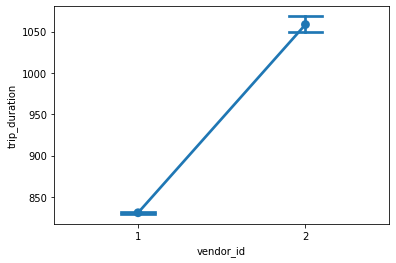

In [23]:
sns.pointplot(x="vendor_id", y="trip_duration", data=df_nz, capsize=.2)

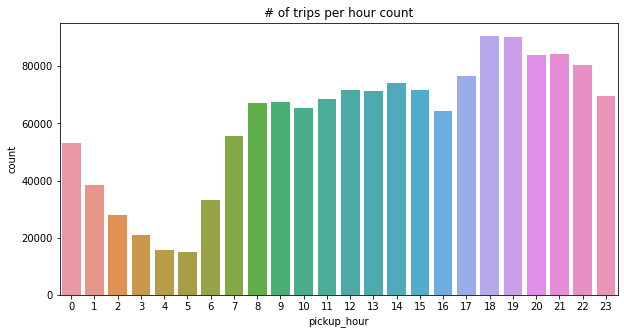

In [146]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_hour)
plt.title('# of trips per hour count')
plt.show()

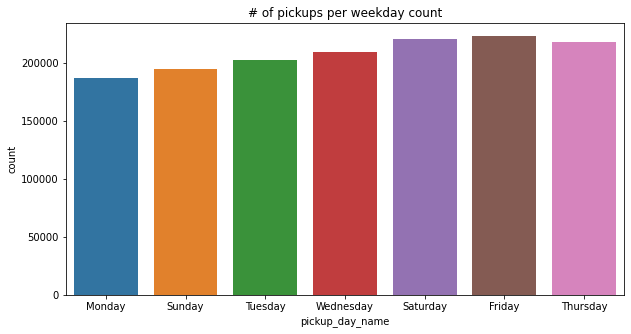

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_day_name)
plt.title('# of pickups per weekday count')
plt.show()

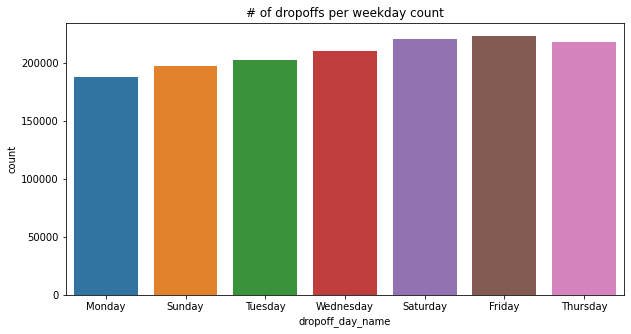

In [148]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.dropoff_day_name)
plt.title('# of dropoffs per weekday count')
plt.show()

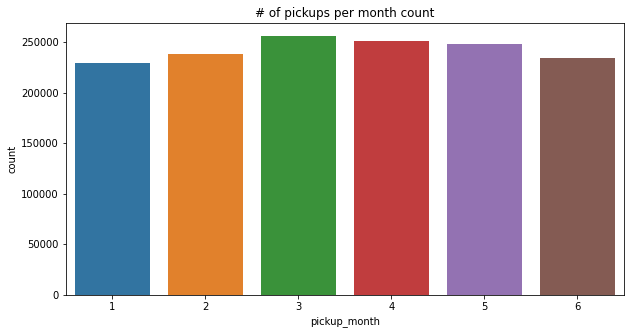

In [149]:
plt.figure(figsize=(10,5))
sns.countplot(df_nz.pickup_month)
plt.title('# of pickups per month count')
plt.show()

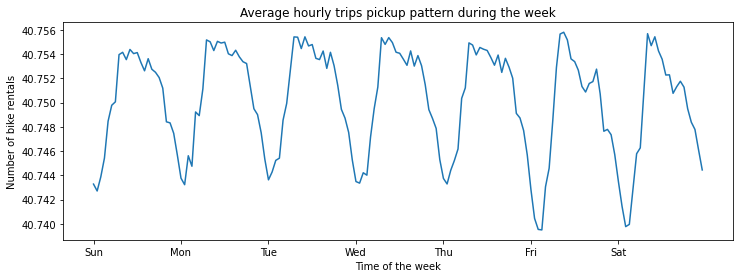

In [150]:
#We can check for sesonality for pickups in a week on hourly basis

fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df_nz.groupby(["pickup_weekday","pickup_hour"])['pickup_latitude'].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly trips pickup pattern during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals")

We came to know that seasonality present in our data on weekday basis following some pattern in order to make model to understand these pattens we can convert our time data to cyclic  periods
Reference - https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html

to capture the natural periodicity we will use trignometric features(sin,cos). 

# Feature Engineering

In [24]:
df_nz.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_month', 'pickup_day_name', 'pickup_hour', 'pickup_weekday',
       'pickup_minute', 'pickup_day', 'dropoff_day', 'dropoff_day_name'],
      dtype='object')

In [25]:
# As we discussed earlier we will drive trignometric features for time data.

df_nz['month_sin']=df_nz['pickup_month'].apply(lambda x: np.sin(x / 12 * 2 * np.pi))

df_nz['weekday_sin']=df_nz['pickup_weekday'].apply(lambda x: np.sin(x / 7 * 2 * np.pi))

df_nz['hour_sin']=df_nz['pickup_hour'].apply(lambda x: np.sin(x / 24 * 2 * np.pi))


In [26]:
# functions for extracting features from lattitude and longitude

# Haversine distance
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # km
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  #  km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h 

# Manhattan distance
# Taxi cant fly ! have to move in blocks/roads
def get_manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = get_haversine_distance(lat1, lng1, lat1, lng2)
    b = get_haversine_distance(lat1, lng1, lat2, lng1)
    return a + b


# get direction (arc tangent angle)
def get_direction(lat1, lng1, lat2, lng2):
    # theta
    AVG_EARTH_RADIUS = 6371  #  km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))




In [27]:
df_nz['haversine_distance']=get_haversine_distance(df_nz['pickup_latitude'].values,df_nz['pickup_longitude'].values,df_nz['dropoff_latitude'].values,df_nz['dropoff_longitude'].values)

df_nz['manhattan_distance']=get_manhattan_distance(df_nz['pickup_latitude'].values,df_nz['pickup_longitude'].values,df_nz['dropoff_latitude'].values,df_nz['dropoff_longitude'].values)

df_nz['trip_direction']=get_direction(df_nz['pickup_latitude'].values,df_nz['pickup_longitude'].values,df_nz['dropoff_latitude'].values,df_nz['dropoff_longitude'].values)

df_nz['center_latitude'] = (df_nz['pickup_latitude'].values + df_nz['dropoff_latitude'].values) / 2
df_nz['center_longitude'] = (df_nz['pickup_longitude'].values + df_nz['dropoff_longitude'].values) / 2


In [28]:
df_nz['avg_speed_h'] = 3600 * df_nz['haversine_distance'] / df_nz['trip_duration']
df_nz['avg_speed_m'] = 3600 * df_nz['manhattan_distance'] / df_nz['trip_duration']

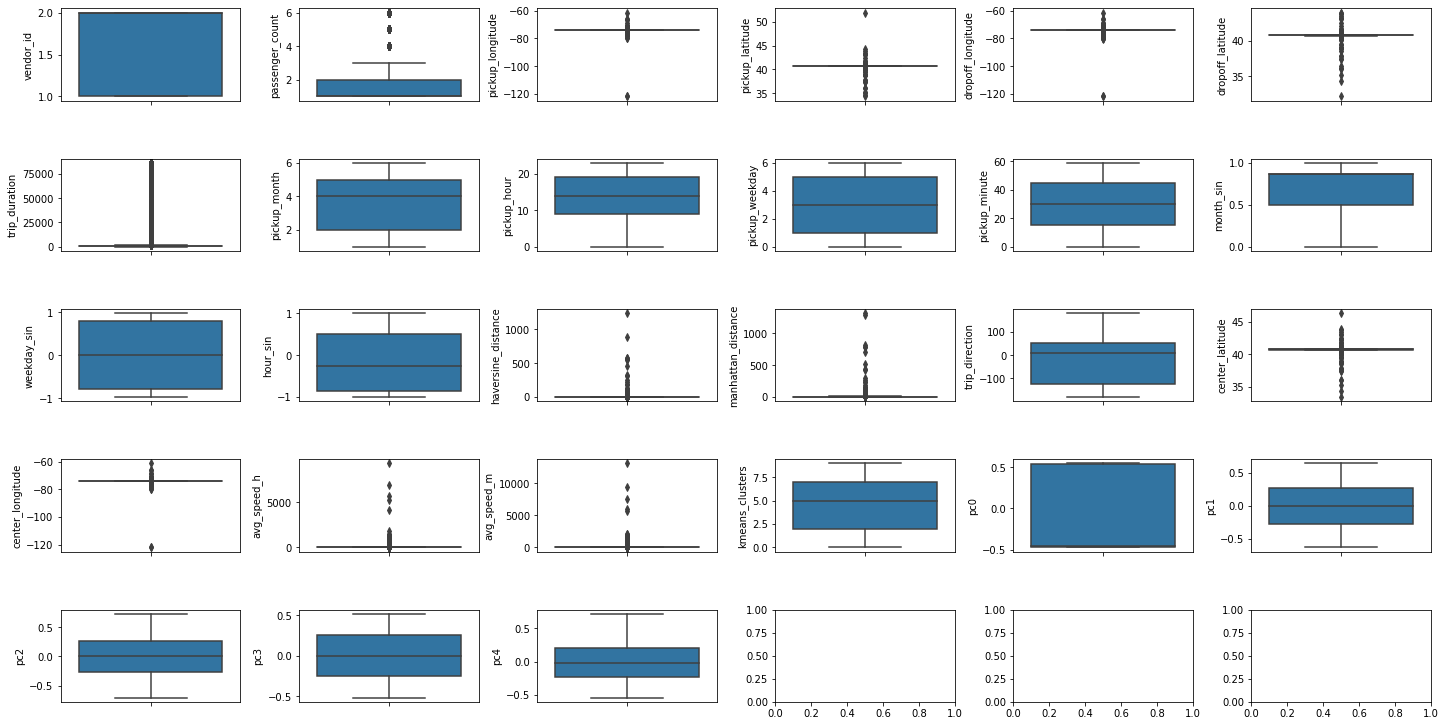

In [226]:
numeric_columns_plot(df_nz[df_nz.describe().columns])

In [29]:
#define a function which can detects and drops the outliers if required

def outliers(df1, drop=False):
    for Feature in df1.columns:
        value = df1[Feature]
        # 25th percentile of the data
        Q1 = np.percentile(value, 25.)
        # 75th percentile of the data
        Q3 = np.percentile(value, 75.)
        # Use the interquartile range to calculate an outlier (1.5 times the interquartile range)
        step = (Q3-Q1)*1.5

        outliers = value[~((value >= Q1 - step) & (value <= Q3 + step))].index.tolist()
        feature_outliers = value[~((value >= Q1 - step) & (value <= Q3 + step))].values

        if drop:
            df1 = df1.drop(df1.index[outliers]).reset_index(drop = True)
            print("New dataset with removed outliers has shape ({}, {})".format(*df1.shape))
    
    return df1

In [36]:
df_nz=df_nz[(df_nz['avg_speed_h']<104) | (df_nz['avg_speed_m']<104)]

In [38]:
df_for_pca=df_nz[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','vendor_id','pickup_weekday','pickup_month','pickup_minute','pickup_hour']]

In [39]:
df_for_pca.shape

(1458418, 9)

In [40]:
# we will try use pca to transform the week features to get imp information by combining all of assumed weak features.

#scaling the data before PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(df_for_pca)
pca = PCA(n_components=.90)
pca.fit(features_scaled)

features_after_pca = pca.transform(features_scaled)
features_after_pca.shape

(1458418, 5)

In [41]:
df_after_pca=pd.DataFrame(features_after_pca)

In [ ]:
df_after_pca.isnull().sum()

In [56]:
df_after_pca[df_after_pca.isnull()]=0

In [42]:
df_nz['pc0'],df_nz['pc1'],df_nz['pc2'],df_nz['pc3'],df_nz['pc4']=df_after_pca[0],df_after_pca[1],df_after_pca[2],df_after_pca[3],df_after_pca[4]

In [43]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,12):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(df_after_pca)
 wcss.append(kmeans.inertia_)
 print('Cluster', i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

Cluster 1 Inertia 921012.3267278565
Cluster 2 Inertia 558170.1103317935


KeyboardInterrupt: ignored

In [44]:
kmean=KMeans(n_clusters=10)
kmean.fit(df_after_pca)

KMeans(n_clusters=10)

In [45]:
df_nz['kmeans_clusters']=kmean.labels_

In [68]:
def outliers_quartile_treatment(df,column_to_treat):
  q3=np.percentile(df[column_to_treat], 75.)
  q1=np.percentile(df[column_to_treat], 25.)
  iqr=(q3-q1)*1.5
  df=df[(df[column_to_treat] > (q1 - iqr)) & (df[column_to_treat] <= (q3 + iqr))]
  return df

In [70]:
df_nz=outliers_quartile_treatment(df_nz,'trip_duration')

In [58]:
# df_nz.to_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/featured_df.csv')
df_nz=pd.read_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/featured_df.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


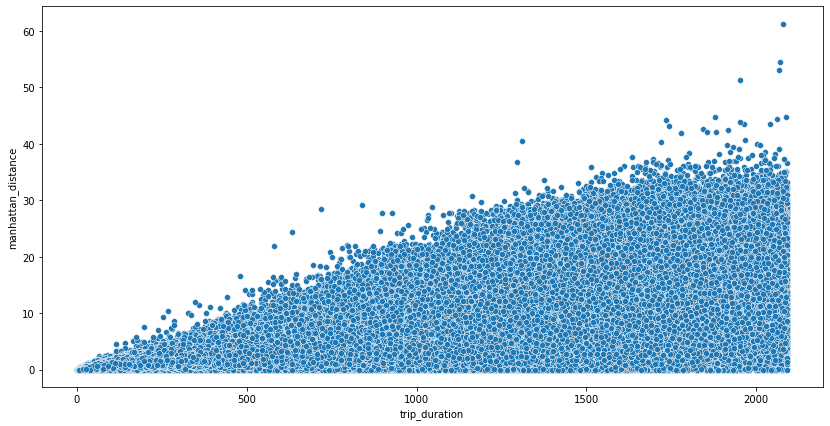

In [72]:
plt.figure(figsize=(14,7))
sns.scatterplot(df_nz.trip_duration,df_nz.manhattan_distance)

In [73]:
df_nz['day_session'] = np.nan
df_nz.loc[df_nz.pickup_hour < 7, 'day_session'] = '1'
df_nz.loc[(df_nz.pickup_hour >= 7) & (df_nz.pickup_hour < 18), 'day_session'] = '2'
df_nz.loc[(df_nz.pickup_hour >= 18) & (df_nz.pickup_hour < 21), 'day_session'] = '3'
df_nz.loc[(df_nz.pickup_hour >= 21) & (df_nz.pickup_hour <= 24), 'day_session'] = '4'


In [ ]:
df_nz_pt.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_minute,pickup_day,dropoff_day,dropoff_day_name,distance_in_km,day_session
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,...,455,3,Monday,17,24,2016-03-14,2016-03-14,Monday,1.502172,day_time
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,...,663,6,Sunday,0,43,2016-06-12,2016-06-12,Sunday,1.808660,early_morning
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,...,2124,1,Tuesday,11,35,2016-01-19,2016-01-19,Tuesday,6.379687,day_time
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,...,429,4,Wednesday,19,32,2016-04-06,2016-04-06,Wednesday,1.483632,evening
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,...,435,3,Saturday,13,30,2016-03-26,2016-03-26,Saturday,1.187038,day_time


In [ ]:
###clean csv file
# df_nz_pt.to_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/df_nz_pt.csv')
df_nz_pt=pd.read_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/df_nz_pt.csv')

In [ ]:

# # import the folium, pandas libraries
# import folium
  
# # initialize the map and store it in a m object
# for i in range(len(a)):
#   m = folium.Map(location = a[i],
#                zoom_start = 4)
  
# # show the map
# m.save('my_map.html')

In [ ]:
# mar = folium.Map(
#     location=[df.pickup_latitude[0],df.pickup_longitude[0]],
#     tiles='Stamen Terrain',
#     zoom_start=13
# )

# for i in a:
#   folium.Marker(
#     list(i),
#     popup='pickup'
# ).add_to(mar)

# mar.save('mar.html')
# mar

In [77]:
featured_df=df_nz.drop(['pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag','pickup_month', 'pickup_day_name', 'pickup_weekday',
       'pickup_minute', 'pickup_day', 'dropoff_day', 'dropoff_day_name'],axis=1)

In [14]:
# featured_df.to_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/featured_df.csv',index=False)
featured_df=pd.read_csv('/content/drive/MyDrive/almabetter/capstone projects/NYC taxi trip duration -regression/featured_df.csv')

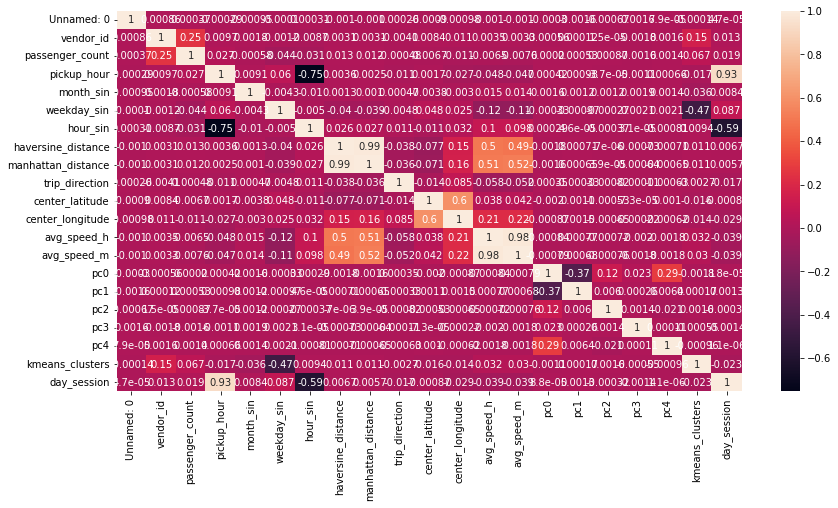

In [7]:
plt.figure(figsize=(14,7))
sns.heatmap(featured_df.drop('trip_duration',axis=1).corr(method='spearman'),annot=True)

In [90]:
featured_df.head(
    
)

,vendor_id,passenger_count,trip_duration,pickup_hour,month_sin,weekday_sin,hour_sin,haversine_distance,manhattan_distance,trip_direction,...,center_longitude,avg_speed_h,avg_speed_m,pc0,pc1,pc2,pc3,pc4,kmeans_clusters,day_session
0,2,1,455,17,1.000000e+00,0.000000,-0.965926,1.498675,1.735711,99.974159,...,-73.973389,11.857645,13.733101,-0.466398,-0.041027,-0.536987,-0.092055,-0.012076,0,2
1,1,1,663,0,1.224647e-16,-0.781831,0.000000,1.805410,2.430516,-117.165634,...,-73.989944,9.803130,13.197373,0.542677,-0.321428,0.730156,0.234603,0.436043,8,1
2,2,1,429,19,8.660254e-01,0.974928,-0.965926,1.485300,1.661047,-172.736786,...,-74.011154,12.464054,13.938856,-0.465847,-0.152132,-0.193410,0.038717,-0.184032,3,3
3,2,1,435,13,1.000000e+00,-0.974928,-0.258819,1.188640,1.199515,179.473511,...,-73.972992,9.837023,9.927017,-0.466024,0.180793,0.284800,0.003794,-0.048192,7,2
4,2,6,443,22,5.000000e-01,-0.974928,-0.500000,1.099062,1.554349,-45.009193,...,-73.987473,8.931430,12.631282,-0.472220,0.546641,0.084888,-0.496490,-0.409554,7,4


In [15]:
abs(featured_df.corr(method='spearman')['trip_duration'])

vendor_id             0.004990
passenger_count       0.021278
trip_duration         1.000000
pickup_hour           0.031573
month_sin             0.011047
weekday_sin           0.041582
hour_sin              0.032619
haversine_distance    0.772004
manhattan_distance    0.758698
trip_direction        0.001829
center_latitude       0.121385
center_longitude      0.063808
avg_speed_h           0.082153
avg_speed_m           0.085393
pc0                   0.001424
pc1                   0.000529
pc2                   0.000457
pc3                   0.000662
pc4                   0.000266
kmeans_clusters       0.012056
day_session           0.028608
Name: trip_duration, dtype: float64

In [16]:
featured_df.var()

vendor_id                  0.248879
passenger_count            1.723175
trip_duration         200764.284695
pickup_hour               41.716659
month_sin                  0.111363
weekday_sin                0.506170
hour_sin                   0.453942
haversine_distance         8.302942
manhattan_distance        14.267603
trip_direction         10951.800823
center_latitude            0.000724
center_longitude           0.004340
avg_speed_h               59.017398
avg_speed_m              106.788026
pc0                        0.248800
pc1                        0.113471
pc2                        0.107576
pc3                        0.086259
pc4                        0.075482
kmeans_clusters            8.093630
day_session                0.847838
dtype: float64

In [ ]:
# df_dummy=df_nz_pt.loc[:,['vendor_id',
#        'passenger_count','pickup_latitude',
#         'dropoff_latitude', 'store_and_fwd_flag',
#        'trip_duration', 'pickup_month', 'pickup_day_name', 'pickup_hour',
#        'distance_in_km', 'day_session']]
# df_dummies=pd.get_dummies(df_dummy,drop_first=True)

In [21]:
featured_df.columns

Index(['vendor_id', 'passenger_count', 'trip_duration', 'pickup_hour',
       'month_sin', 'weekday_sin', 'hour_sin', 'haversine_distance',
       'manhattan_distance', 'trip_direction', 'center_latitude',
       'center_longitude', 'avg_speed_h', 'avg_speed_m', 'pc0', 'pc1', 'pc2',
       'pc3', 'pc4', 'kmeans_clusters', 'day_session'],
      dtype='object')

In [115]:
feature_col=['passenger_count','pickup_hour',
       'month_sin', 'weekday_sin', 'hour_sin', 'haversine_distance',
       'manhattan_distance', 'trip_direction', 'center_latitude',
       'center_longitude', 'avg_speed_h', 'avg_speed_m', 'pc0', 'pc1', 'pc2',
       'kmeans_clusters', 'day_session']

In [116]:
feature=featured_df[feature_col]

label=featured_df['trip_duration']

In [117]:
feature.kmeans_clusters=feature.kmeans_clusters.astype('category')
feature.passenger_count=feature.passenger_count.astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [118]:
feature_dummies=pd.get_dummies(feature,drop_first=True)

In [122]:
# feature_dummies.isnull().sum()
feature_dummies[feature_dummies.isnull()]=0
feature_dummies.columns

Index(['pickup_hour', 'month_sin', 'weekday_sin', 'hour_sin',
       'haversine_distance', 'manhattan_distance', 'trip_direction',
       'center_latitude', 'center_longitude', 'avg_speed_h', 'avg_speed_m',
       'pc0', 'pc1', 'pc2', 'day_session', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'kmeans_clusters_1', 'kmeans_clusters_2',
       'kmeans_clusters_3', 'kmeans_clusters_4', 'kmeans_clusters_5',
       'kmeans_clusters_6', 'kmeans_clusters_7', 'kmeans_clusters_8',
       'kmeans_clusters_9'],
      dtype='object')

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

x_train,x_test,y_train,y_test=train_test_split(feature_dummies, label, test_size=0.45,random_state=40)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [123]:
# Evaluation metrics 
def print_metrics(actual,prediction,model=''):

  print(f"{model} R2          :", r2_score(actual,prediction))
  print(f"{model} MAE         :", mean_absolute_error(actual,prediction))
  print(f"{model} MSE         :", mean_squared_error(actual,prediction))
  print(f"{model} RMSE        :", np.sqrt(mean_squared_error(actual,prediction)))
  print(f"{model} Adjusted R2 :",1-(1-r2_score(actual,prediction))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [59]:

#baseline model
test=pd.DataFrame()
test['y_test']=pd.DataFrame(y_test.values)
test['ymean']=test.y_test.mean()

print_metrics((test['y_test']),(test['ymean']),'Base')


Base  R2: 0.0
Base  MAE: 360.98335604429946
Base  MSE: 200661.9712283464
Base  RMSE: 447.95309043285596


In [146]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train,y_train)
y_train_pred = cross_val_predict(lr,x_train,y_train,cv=5)
y_pred=lr.predict(x_test)
print_metrics((y_train),(y_train_pred),'LR_train')
print_metrics((y_test),(y_pred),'LR_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

LR_train  R2: 0.7609104100977435
LR_train  MAE: 152.66475421644415
LR_train  MSE: 48020.57617525605
LR_train  RMSE: 219.13597645128024
LR_test  R2: 0.7608746445817971
LR_test  MAE: 152.98986420439581
LR_test  MSE: 47983.36518889553
LR_test  RMSE: 219.0510561236707
Adjusted R2 :  0.7608635111155715


In [75]:
# checking for cv score to know whether our model is generalize with shuffle splits also or not
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(lr,x_train,y_train, cv=cv)

array([0.74059306, 0.73944394, 0.74008077, 0.73924506, 0.74086552])

In [107]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='squared_error',random_state=100,n_estimators=8,max_depth=8).fit(x_train,y_train)
y_train_pred = cross_val_predict(rf,x_train,y_train,cv=5)
y_pred=rf.predict(x_test)
print_metrics((y_train),(y_train_pred),'rf_train')
print_metrics((y_test),(y_pred),'rf_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

rf_train  R2: 0.9827646007908714
rf_train  MAE: 30.914350682553792
rf_train  MSE: 3461.6889885137616
rf_train  RMSE: 58.83611976085576
rf_test  R2: 0.981379357779324
rf_test  MAE: 32.61848581056585
rf_test  MSE: 3736.4547735386254
rf_test  RMSE: 61.12654720772821


Text(0, 0.5, 'feature')

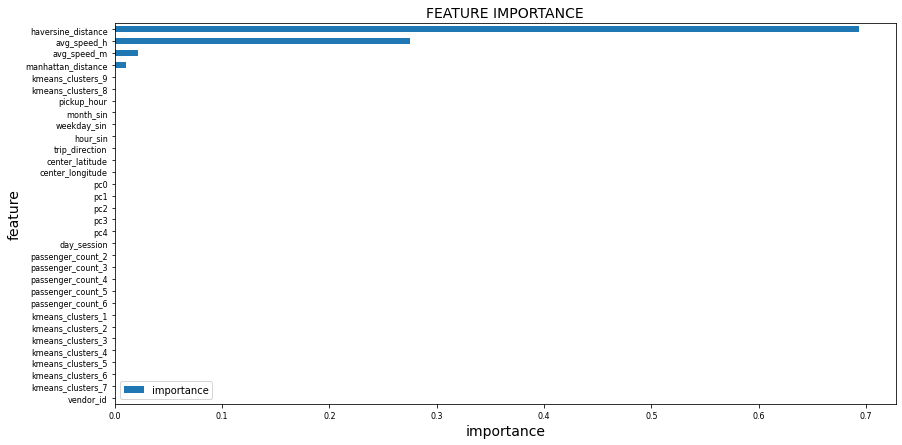

In [113]:
pd.DataFrame({'feature':feature_dummies.columns, \
              'importance': rf.feature_importances_})\
              .sort_values('importance')\
              .set_index('feature')\
              .plot(kind='barh', fontsize=8,figsize=(14,7))

plt.title('FEATURE IMPORTANCE',fontsize=14 )
plt.xlabel('importance',fontsize=14)
plt.ylabel('feature',fontsize=14)

In [154]:
tuning_feature_dummies=feature_dummies[['pickup_hour', 'month_sin', 'weekday_sin', 'hour_sin',
       'haversine_distance', 'manhattan_distance', 'trip_direction',
       'center_latitude', 'center_longitude', 'avg_speed_h', 'avg_speed_m',
       'pc0', 'pc1', 'day_session', 'passenger_count_2',
       'kmeans_clusters_8','kmeans_clusters_9']]

In [155]:
x_train,x_test,y_train,y_test=train_test_split(tuning_feature_dummies, label, test_size=0.45,random_state=40)

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [156]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'n_estimators' : np.arange(1,10,2),
    'max_depth': [3,4,5,6,7,8],
}

In [157]:
rf_tuned=RandomizedSearchCV(rf, param_grid, cv=cv, n_iter = 10)

In [ ]:
rf_tuned.fit(x_train,y_train)

In [ ]:
y_train_pred = rf_tuned.predict(x_train)
y_pred=rf_tuned.predict(x_test)
print_metrics((y_train),(y_train_pred),'rf_train')
print_metrics((y_test),(y_pred),'rf_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(classifier_dtc)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0]) 

In [ ]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(classifier_dtc).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor



gbrt = GradientBoostingRegressor(criterion='mse',random_state=10,n_estimators=2).fit(x_train,y_train)
cv = cross_val_score (gbrt,x_train,y_train,cv=5)
print(" Average CV is: ", cv.mean())
Ypred=gbrt.predict(x_test)
MAE=mean_absolute_error(y_test,Ypred)
MSE=mean_squared_error(y_test,Ypred)
print("GBR MAE:", MAE)
print("GBR MSE:", MSE)
print("GBR RMSE:", np.sqrt(MSE))
print("GBR Training set score: {:.5f}".format(gbrt.score(x_train,y_train)))
print("GBR Test set score: {:.5f}".format(gbrt.score(x_test,y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Cr

 Average CV is:  0.19783339539329436
GBR MAE: 0.23307284517575388
GBR MSE: 0.0964722168392031
GBR RMSE: 0.310599769541452
GBR Training set score: 0.19797
GBR Test set score: 0.19767


In [ ]:
10**Ypred

array([ 424.63694306,  764.92681001, 3214.90703271, ..., 1564.03538383,
        681.61763334,  529.66945552])

In [ ]:

MAE=mean_absolute_error(10**y_test,10**Ypred)
MSE=mean_squared_error(10**y_test,10**Ypred)
print("RF MAE:", MAE)
print("RF MSE:", MSE)
print("RF RMSE:", np.sqrt(MSE))

RF MAE: 306214193717.84814
RF MSE: 3.419162204737427e+28
RF RMSE: 184909767311989.97
